# Used Car Sales

## Task description

Can you help us estimate the price we should list a car for? The team estimates are always around 30% away from the price we know the car will sell for, we really want to be within 10% of the price.

## Data Validation

Here are the first five rows of our data:

In [1]:
import pandas as pd

data = pd.read_csv('toyota.csv')
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


We were provided with the following description of the dataset:

**model** Character, the model of the car, 18 possible values

**year** Numeric, year of registration from 1998 to 2020

**price** Numeric, listed value of the car in GBP

**transmission** Character, one of "Manual", "Automatic", "Semi-Auto" or "Other"

**mileage** Numeric, listed mileage of the car at time of sale

**fuelType** Character, one of "Petrol", "Hybrid", "Diesel" or "Other"

**tax** Numeric, road tax in GBP. Calculated based on CO2 emissions or
a fixed price depending on the age of the car.

**mpg** Numeric, miles per gallon as reported by manufacturer

**engineSize** Numeric, listed engine size, one of 16 possible values

As you can see below, data types are matching the description, and there are no missing values:

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


Let's validate each column of the dataset.

**model** Character, the model of the car, 18 possible values

Indeed, we have 18 models:

In [3]:
print(data['model'].describe())
data['model'].unique()

count       6738
unique        18
top        Yaris
freq        2122
Name: model, dtype: object


array([' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
       ' Prius', ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO',
       ' Land Cruiser', ' Supra', ' Camry', ' Verso-S', ' IQ',
       ' Urban Cruiser'], dtype=object)

**year** Numeric, year of registration from 1998 to 2020

This is correct:

In [4]:
import numpy as np

np.sort(data['year'].unique())

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020], dtype=int64)

**price** Numeric, listed value of the car in GBP

Prices are from 850 to 59,995:

In [5]:
data['price'].describe()

count     6738.000000
mean     12522.391066
std       6345.017587
min        850.000000
25%       8290.000000
50%      10795.000000
75%      14995.000000
max      59995.000000
Name: price, dtype: float64

**transmission** Character, one of "Manual", "Automatic", "Semi-Auto" or "Other"

This is correct:

In [6]:
data['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

**mileage** Numeric, listed mileage of the car at time of sale

Mileage is from 2 to 174,419:

In [7]:
data['mileage'].describe()

count      6738.000000
mean      22857.413921
std       19125.464147
min           2.000000
25%        9446.000000
50%       18513.000000
75%       31063.750000
max      174419.000000
Name: mileage, dtype: float64

**fuelType** Character, one of "Petrol", "Hybrid", "Diesel" or "Other"

This is correct:

In [8]:
data['fuelType'].unique()

array(['Petrol', 'Other', 'Hybrid', 'Diesel'], dtype=object)

**tax** Numeric, road tax in GBP. Calculated based on CO2 emissions or a fixed price depending on the age of the car.

Road tax is from 0 to 565 GBP:

In [9]:
data['tax'].describe()

count    6738.000000
mean       94.697240
std        73.880776
min         0.000000
25%         0.000000
50%       135.000000
75%       145.000000
max       565.000000
Name: tax, dtype: float64

**mpg** Numeric, miles per gallon as reported by manufacturer

Miles per gallon are from 2.8 to 235:

In [10]:
data['mpg'].describe()

count    6738.000000
mean       63.042223
std        15.836710
min         2.800000
25%        55.400000
50%        62.800000
75%        69.000000
max       235.000000
Name: mpg, dtype: float64

**engineSize** Numeric, listed engine size, one of 16 possible values

Indeed, we have 16 unique values:

In [11]:
print("Unique sizes #: " + str(len(data['engineSize'].unique())))
data['engineSize'].unique()

Unique sizes #: 16


array([2. , 1.8, 1.2, 1.6, 1.4, 2.5, 2.2, 1.5, 1. , 1.3, 0. , 2.4, 3. ,
       2.8, 4.2, 4.5])

Hovewer, one of the unique values is zero. Let's explore which cars have engine size listed as 0:

In [12]:
data[data['engineSize'] == 0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
2535,Yaris,2016,12300,Manual,6148,Hybrid,0,86.0,0.0
2545,Yaris,2016,11000,Automatic,39909,Hybrid,0,86.0,0.0
5126,Aygo,2019,9800,Manual,3635,Petrol,150,56.5,0.0
5233,Aygo,2019,8000,Manual,8531,Petrol,145,56.5,0.0
5257,Aygo,2019,8000,Manual,5354,Petrol,145,56.5,0.0
5960,C-HR,2017,14300,Manual,46571,Petrol,145,47.1,0.0


Since engine size can't be zero, let's substitute zeros with the most common engine size for given model and fuel type:

In [13]:
for index in data[data['engineSize'] == 0].index:
    data.loc[index, 'engineSize'] = data[(data['model'] == data.loc[index, 'model']) & \
                    (data['fuelType'] == data.loc[index, 'fuelType'])]['engineSize'].mode().values[0]
    
print("Unique sizes #: " + str(len(data['engineSize'].unique())))
data['engineSize'].unique()

Unique sizes #: 15


array([2. , 1.8, 1.2, 1.6, 1.4, 2.5, 2.2, 1.5, 1. , 1.3, 2.4, 3. , 2.8,
       4.2, 4.5])

## Exploratory Analysis

Let's look at the distribution of prices via the boxplot. We'll set the whiscers to outline 99% of values:

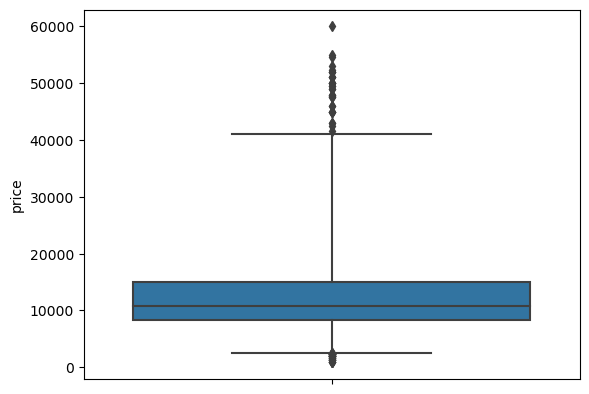

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data, y='price', whis=[0.5,99.5])

plt.show()

We see that 75% of the cars have price in very narrow range, and 1% of the cars have prices that are far away from that range. Let's explore if these values are worthy to be included in our model:

In [15]:
# Cars with the highest prices
data[data['price'] > data['price'].quantile(0.99)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
356,RAV4,2019,32995,Automatic,7017,Hybrid,135,49.6,2.5
381,RAV4,2019,37440,Automatic,2764,Hybrid,135,51.1,2.5
394,RAV4,2019,34990,Automatic,5000,Hybrid,135,49.6,2.5
407,RAV4,2019,34990,Automatic,5660,Hybrid,140,49.6,2.5
457,RAV4,2019,33880,Automatic,7576,Hybrid,140,49.6,2.5
...,...,...,...,...,...,...,...,...,...
6707,Supra,2019,51995,Semi-Auto,4153,Petrol,145,34.5,3.0
6708,Supra,2019,49499,Automatic,10,Petrol,145,34.5,3.0
6709,Supra,2019,48950,Automatic,2771,Petrol,145,34.5,3.0
6710,Supra,2019,49490,Automatic,162,Petrol,145,34.5,3.0


In [16]:
# Cars with the lowest prices
data[data['price'] < data['price'].quantile(0.01)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
74,Corolla,2005,1300,Manual,129000,Petrol,260,36.7,1.8
259,Corolla,2003,1495,Manual,89000,Petrol,235,39.2,1.6
263,Corolla,2004,1250,Manual,111000,Petrol,260,37.2,1.8
282,Corolla,2003,2195,Automatic,102000,Petrol,300,34.5,1.8
289,Corolla,2001,899,Automatic,76000,Petrol,300,35.3,1.6
...,...,...,...,...,...,...,...,...,...
6431,Avensis,2007,1200,Automatic,120000,Petrol,300,36.7,1.8
6434,Verso,2009,2300,Manual,131797,Diesel,160,51.4,2.0
6511,Verso,2003,2395,Automatic,104000,Petrol,300,34.5,1.8
6728,IQ,2009,2699,Manual,74095,Petrol,0,65.7,1.0


It looks like lowest and highest prices are due to high and low mileage. Let's check it with the scatter plot:

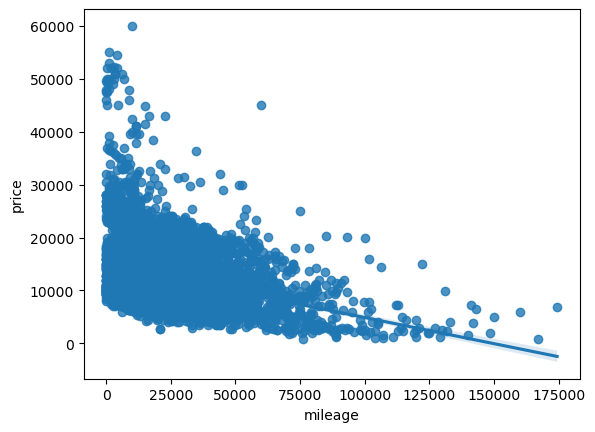

In [17]:
sns.regplot(data=data, x='mileage', y='price')
plt.show()

Indeed, the plot confirms our hypothesis, so we won't exclude these extremes from our model.

Let's explore how prices are affected by year, fuel type and engine size:

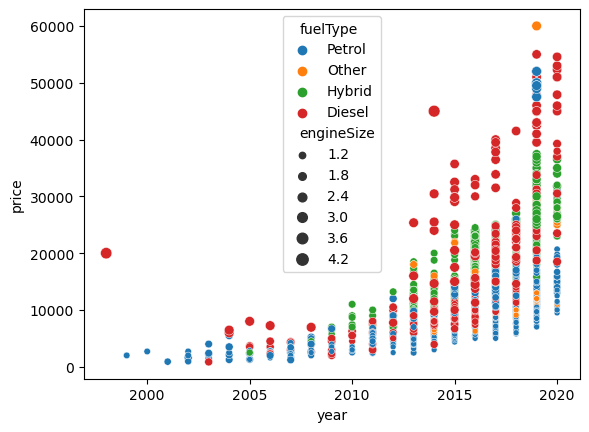

In [18]:
sns.scatterplot(data=data, x='year', y='price', hue='fuelType', size='engineSize')
plt.show()

It looks like newer cars are more expensive, as well as cars with diesel fuel type and a big engine.

## Model Development

### Linear Regression

We deal here with a regression problem, so let's start with a linear regression model. Then we'll try Random Forests.

We'll do one-hot encoding on categorical features:

In [19]:
data = pd.get_dummies(data, columns=['model', 'transmission', 'fuelType'], drop_first=True)
data.head()

,year,price,mileage,tax,mpg,engineSize,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,...,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2016,16000,24089,265,36.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2017,15995,18615,145,36.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2015,13998,27469,265,36.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2017,18998,14736,150,36.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2017,17498,36284,145,36.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


Let's split our data into a train and a test set:

In [20]:
# Set SEED for reproducibility
SEED = 37

from sklearn.model_selection import train_test_split

X = data.drop(['price'], axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

Let's normalize all the features:

In [21]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()

# Scale the training and test features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now, let's perform 6-fold cross validation on Linear Regression model and calculate mean error (RMSE, root mean squared error, average RMSE of 6-folds):

In [22]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Import the modules for cross-validation
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=SEED)

# Perform cross-validation
scores = cross_val_score(reg, X_train_scaled, y_train, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(np.abs(scores))
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

Average RMSE: 1722.9168926132118
Standard Deviation of the target array: 6344.546731231183


We can see that the average RMSE is way lower than the standard deviation of the target variable (price), suggesting the model is reasonably accurate.

Let's explore how the independent variables affect the price, according to the linear regression model:

In [23]:
reg.fit(X_train_scaled, y_train)
feature_effect = pd.Series(data=reg.coef_, index=X.columns)
feature_effect

year                      1744.438765
mileage                  -1193.292368
tax                       -309.561936
mpg                       -173.748241
engineSize                1504.925159
model_ Avensis             142.186079
model_ Aygo              -1135.614092
model_ C-HR               1435.674819
model_ Camry               282.569514
model_ Corolla             994.252027
model_ GT86                557.930015
model_ Hilux               899.716708
model_ IQ                   -9.135505
model_ Land Cruiser       1988.594238
model_ PROACE VERSO        668.921400
model_ Prius               894.066137
model_ RAV4               1174.496188
model_ Supra              1166.391291
model_ Urban Cruiser         1.296486
model_ Verso               135.144567
model_ Verso-S              10.040970
model_ Yaris              -696.861064
transmission_Manual       -631.693139
transmission_Other          13.667133
transmission_Semi-Auto      12.453798
fuelType_Hybrid           1367.961896
fuelType_Oth

As we saw before on plots, price gets higher as year and engine size gets higher, and price gets lower as mileage get higher.

### Random Forests

Now, let's try Random Forests with grid search and 6-fold cross-validation:

In [24]:
# Parameters for grid search
params_rf = {'n_estimators': [100, 500, 1000], 'max_features': ['log2', 'sqrt', 0.8, 1.0], \
             'min_samples_leaf': [1, 2, 10]}

# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(random_state=SEED)

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=6,
                       verbose=2,
                       n_jobs=-1)

# Train the models
grid_rf.fit(X_train_scaled, y_train)

Fitting 6 folds for each of 36 candidates, totalling 216 fits


GridSearchCV(cv=6, estimator=RandomForestRegressor(random_state=37), n_jobs=-1,
             param_grid={'max_features': ['log2', 'sqrt', 0.8, 1.0],
                         'min_samples_leaf': [1, 2, 10],
                         'n_estimators': [100, 500, 1000]},
             scoring='neg_mean_squared_error', verbose=2)

Let's look at the parameters from the grid search with the highest score:

In [25]:
grid_rf.best_params_

{'max_features': 0.8, 'min_samples_leaf': 2, 'n_estimators': 500}

We can see, that none of the best parameters are on the extremes of our grid search, therefore, w, most likely, don't need to extend the grid.

Now, let's look at the mean error of the best estimator (RMSE, root mean squared error, average RMSE of 6-folds): 

In [ ]:
rmse_RF = abs(grid_rf.best_score_) ** (1/2)

print('Average RMSE of the best Random Forests model: {:.3f}'.format(rmse_RF)) 
print('Average RMSE of the Linear Regression model: {:.3f}'.format(np.mean(rmse)))

We can see, that the best Random Forests model performed better, that the the Linear Regression model.

Let's explore how important the independent variables for predicting the price, according to the best Random Forests model. The result is the percentage of the total effect, expressing the importance of the feature, NOT the vector and magnitude of the effect:

In [ ]:
best_RF = grid_rf.best_estimator_

feature_importances_RF = pd.Series(data=best_RF.feature_importances_, index=X.columns)
round(feature_importances_RF, 3) * 100

In [ ]:
As we can see, according to the best Random Forests model, year and engine size are the main factors.